In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import ImageGrid



# Purkkaratkaisu matriisien lukemiseksi, kun xr-funktioilla ei näyttänyt
# fiksusti onnistuvan

B_s = [] # list for storing prior covariance matrices
A_s = [] # posterior covariance matrices
R_s = [] # observation error covariance matrices
for i in range(5):
    data = xr.open_dataset(f"simulated_data/simulation_05/s05_out_0{i}.nc")
    B_s.append(data["prior_cov"])
    A_s.append(data["posterior_cov"])
    R_s.append(data["obs_unc"])




The easiest but ugliest way out: each subplot has its own colorbar, and colorbar ranges differ.


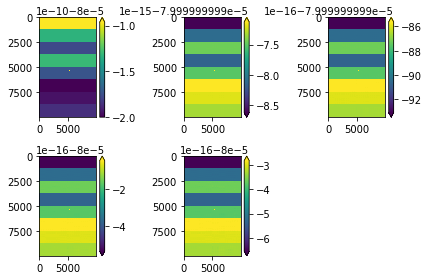

In [2]:

fig, axs = plt.subplots(2,3)
axs[-1,-1].axis('off')
for k in range(5):
    i = k // 3
    j = k - 3*i
    A_s[k].plot.imshow(ax = axs[i,j], yincrease = False, robust = True, add_labels = False)
plt.tight_layout()
plt.show()



QUANTILES + SYMLOGNORM

Problem with SymLogNorm: plots a really nice plot but the colormap doesn't center at zero

Colorbar min and max set manually to certain quantiles.
Alfa has to be really small < 10**(-3) 
Otherwise all but the first subplot seem to become uniformly one color
because such an immense part of the values within very small range around zero


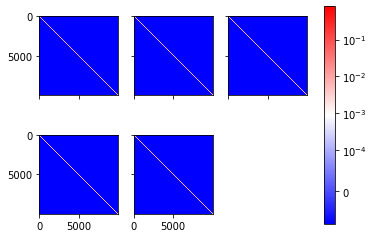

In [24]:

fig, axs = plt.subplots(2,3)
axs[-1,-1].axis('off')

images = []
for k in range(5):
    i = k // 3
    j = k - 3*i
    images.append(axs[i,j].imshow(A_s[k], cmap = 'viridis'))
    axs[i, j].label_outer()

# Find the quantiles to use as colorbar min and max

    
qlower = min(np.quantile(A.values, 10**(-5)) for A in A_s)
qupper = max(np.quantile(A.values, (1-10**(-5))) for A in A_s)
vmin = min(A.values.min() for A in A_s)
vmax = max(A.values.max() for A in A_s)

norm = colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh = 10**(-4))
for im in images:
    im.set_norm(norm)

fig.colorbar(im, ax=axs.ravel().tolist(), norm = norm)
plt.show()





How about matshow?



In [ ]:



# fig, axes = plt.subplots(nrows=nr, ncols=nc)
# axes[-1,-1].axis('off')
# for k in range(5):
#     i = k // 3
#     j = k - 3*i
#     im = axes[i,j].matshow(A_s[k])

# fig.colorbar(im, ax=axes.ravel().tolist(), norm = colors.Normalize)

# plt.show()